## Introduction
Money spend on advertising is wasted and the key is finding the right areas to focus.
Many companies found it difficult to quantify the impact of various advertising channels such as 
newspapers,television,radio etc on their products. Though there were certain methods adopted by these companies 
as a solution to the problem,those methods consisted more of naive approaches rather than sophisticated and 
reliable techniques.
Art of marketing measurements became more matured finding better ways to gain insights from the complex array of marketing measurements which came to be known as Marketing Mix Modelling.

#### Note: In this notebook, only one of the subcategory: ConsumerElectronics: 'Gaming' is considered. Similarly, for other categories, the data can be analysed. 

### MMM/MMX
Marketing Mix Modelling encompasses the method of statistical analysis such as regression on sales and marketing data 
to estimate the impact of various marketing tactics on sales and then predict the impact of future sets of tactics. 
It is also used to optimize the advertising mix and promotional tactics with respect to sales revenue or profit.

#### Objective:
Objective is to find the effect of various variables that have a effect on the revenue so that we can allocate the budget only on the variables which has a positive impact on the revenue. The revenue is 'GMV' according to the given dataset. 

#### Marketing : This term corresponds to the understanding the market.
Mix : Mix here refers to how much importance should each P be given in the 4 P(Product,price,place and promotion)
Modelling : Modelling here refers to the optimization and building the model.
    
The 4Ps:
Product - sales force, Price - advertising, Promotion - sales promotion and Place - public relations

#### Strengths:
It reflects on the past marketing decisions taken, by calculating return on investment (ROI).
It helps to optimize the marketing mix for companies by forecasting the likely impact of changes to various marketing 
mix variables.
It helps in finding the changes in business performance by isolating the impact of internal and external factors.

#### Weakness:
The focus on short-term sales can significantly under-value the importance of longer-term equity building activities.
MMM used for media mix optimization, has a bias in favor of time-dependent media (such as Television) versus less 
time-dependent media (such as ads appearing in monthly magazines); biases can also occur when comparing broad-based 
media versus demographically targeted media.

#### Flow of the noteboook
- Reading and Understanding Consumer Dataset
- Checking quality issues especially for GMV, date, time 
- Creating new varibles
- Aggregate data on weakly basis

- Reading and Understanding Investment Dataset
- Reading and Understanding Climate Dataset
- Creating AdStock, Moving Average and Lag variables
- Model Building



In [372]:
# importing libraries
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.api as sm
#import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Consumer data

In [373]:
#Loading the dataset containing sales transactions
ConsumerElectronics = pd.read_csv("./ConsumerElectronics.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [374]:
ConsumerElectronics[1:5]

,FSN_ID,Order_date,Year,Month,Order_id,Order_item_id,GMV,Units,DeliveryBdays,DeliveryCdays,Payment_Mode,SLA,Cust_ID,Pincode,Product_super_category,Product_category,Product_sub_category,Product_vertical,Product_MRP,Procurement_SLA
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [375]:
#Actual values of Order_id, Order_item_id are float, thought in display not visible
ConsumerElectronics.iloc[0, 4]

3419300926147000.0

In [376]:
#Set to see values in pandas output
pd.set_option('display.float_format', '{:0.3f}'.format)

In [377]:
ConsumerElectronics.describe()

,Year,Month,Order_id,Order_item_id,Units,SLA,Product_MRP,Procurement_SLA
count,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000
mean,2015.519,6.586,2842444674146328.500,13756277530325384.000,1.022,5.688,4108.309,5.403
std,0.500,3.623,1269134332596894.250,55945981798631008.000,0.254,2.983,8510.918,53.466
min,2015.000,1.000,76331515.000,108016495.000,1.000,0.000,0.000,-1.000
25%,2015.000,3.000,1602588503969575.000,1606725138262300.000,1.000,4.000,799.000,1.000
50%,2016.000,6.000,2611824528743350.000,2619185472741150.000,1.000,6.000,1599.000,2.000
75%,2016.000,10.000,3610613539366250.000,4397705931628400.000,1.000,7.000,3499.000,3.000
max,2016.000,12.000,5395076790260600.000,300037347717704000.000,50.000,1006.000,299999.000,1000.000


In [378]:
# Renaming some of the columns 
ConsumerElectronics.rename(columns={"FSN_ID": "FSN_ID", "Order_date": "Order_date", "Order_id": "Order_id", "Order_item_id": "Order_item_id", "Payment_Mode": "payment_mode", "SLA" : "Procurement_SLA" })

,FSN_ID,Order_date,Year,Month,Order_id,Order_item_id,GMV,Units,DeliveryBdays,DeliveryCdays,payment_mode,Procurement_SLA,Cust_ID,Pincode,Product_super_category,Product_category,Product_sub_category,Product_vertical,Product_MRP,Procurement_SLA
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3419300926147000.000,3419300926147000.000,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1420830839915200.000,1420830839915200.000,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2421912925714800.000,2421912925714800.000,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4416592101738400.000,4416592101738400.000,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4419525153426400.000,4419525153426400.000,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
5,ACCCX3S5JGAJETYR,2015-10-17 12:07:24,2015,10,3419188825145600.000,3419188825145600.000,3324,1,\N,\N,Prepaid,5,-7.64154636189174E+018,-1.91905269756031E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
6,ACCCX3S5JGAJETYR,2015-10-16 14:59:57,2015,10,3418428515041500.000,3418428515041500.000,3695,1,\N,\N,Prepaid,6,-7.15614041481066E+016,6.40491320207757E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
7,ACCCX3S5JGAJETYR,2015-10-15 23:41:39,2015,10,3417799002820700.000,3417799002820700.000,3695,1,\N,\N,COD,5,9.17327596234152E+018,-1.60630305201981E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2417869738304300.000,2417869738304300.000,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
9,ACCCX3S5JGAJETYR,2015-10-25 22:52:34,2015,10,4426481574167600.000,4426481574167600.000,3695,1,\N,\N,COD,7,-7.80915606896163E+018,-9.779010321304E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5


### EDA

In [379]:
ConsumerElectronics.describe(include='all')

,FSN_ID,Order_date,Year,Month,Order_id,Order_item_id,GMV,Units,DeliveryBdays,DeliveryCdays,Payment_Mode,SLA,Cust_ID,Pincode,Product_super_category,Product_category,Product_sub_category,Product_vertical,Product_MRP,Procurement_SLA
count,1648824,1648824,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824.000,1648824,1648824,1648824,1648824.000,1648824,1648824.000,1648824,1648824,1648824,1648824,1648824.000,1648824.000
unique,21219,1155192,nan,nan,nan,nan,18086.000,nan,143,171,2,nan,1253495,12973.000,1,5,14,74,nan,nan
top,ACCE6VGHYKYFX4WB,2016-04-27 00:19:27,nan,nan,nan,nan,999.000,nan,\N,\N,COD,nan,,-9031043207091489792.000,CE,EntertainmentSmall,Speaker,LaptopSpeaker,nan,nan
freq,37622,294,nan,nan,nan,nan,23738.000,nan,1312972,1312971,1191443,nan,4904,7743.000,1648824,944698,543928,287850,nan,nan
mean,NaN,NaN,2015.519,6.586,2842444674146328.500,13756277530325384.000,nan,1.022,NaN,NaN,NaN,5.688,NaN,nan,NaN,NaN,NaN,NaN,4108.309,5.403
std,NaN,NaN,0.500,3.623,1269134332596894.250,55945981798631008.000,nan,0.254,NaN,NaN,NaN,2.983,NaN,nan,NaN,NaN,NaN,NaN,8510.918,53.466
min,NaN,NaN,2015.000,1.000,76331515.000,108016495.000,nan,1.000,NaN,NaN,NaN,0.000,NaN,nan,NaN,NaN,NaN,NaN,0.000,-1.000
25%,NaN,NaN,2015.000,3.000,1602588503969575.000,1606725138262300.000,nan,1.000,NaN,NaN,NaN,4.000,NaN,nan,NaN,NaN,NaN,NaN,799.000,1.000
50%,NaN,NaN,2016.000,6.000,2611824528743350.000,2619185472741150.000,nan,1.000,NaN,NaN,NaN,6.000,NaN,nan,NaN,NaN,NaN,NaN,1599.000,2.000
75%,NaN,NaN,2016.000,10.000,3610613539366250.000,4397705931628400.000,nan,1.000,NaN,NaN,NaN,7.000,NaN,nan,NaN,NaN,NaN,NaN,3499.000,3.000


In [380]:
pd.value_counts(ConsumerElectronics['GMV'].values, sort=False)

0.0                   883
10.0                   12
17.0                    1
19.0                    2
20.0                    1
26.0                   14
28.0                   18
29.0                    4
30.0                    1
39.0                    5
40.0                   44
45.0                   23
46.0                    1
48.0                   65
49.0                  218
50.0                   15
51.0                    1
52.0                    3
53.0                   13
54.0                    5
55.0                   22
56.0                    2
58.0                   23
59.0                   75
60.0                   32
65.0                    6
67.0                    5
68.0                   60
69.0                  295
3660                   19
73.0                   20
75.0                    3
76.0                    6
77.0                    2
78.0                    3
79.0                  293
80.0                   24
82.0                    4
83.0        

In [381]:
#Profile dataset to identify multicollinearity and variable distributions
import pandas_profiling
pandas_profiling.ProfileReport(ConsumerElectronics)

Number of variables,20
Number of observations,1648824
Total Missing (%),0.0%
Total size in memory,251.6 MiB
Average record size in memory,160.0 B
Numeric,7
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [382]:
pd.value_counts(ConsumerElectronics['Month'].values, sort=False)

1     143768
2     144084
3     153299
4     134390
5     157072
6     121798
7      89285
8        271
9     209202
10    207301
11    130203
12    158151
dtype: int64

In [383]:
corr = ConsumerElectronics.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,Order_id,Order_item_id,Units,SLA,Product_MRP,Procurement_SLA
Year,1,-0.898153,0.178683,-0.162142,-0.0104454,-0.008341,0.0126816,0.0096245
Month,-0.898153,1,-0.0485694,0.103273,0.00952145,-0.0234425,-0.0041712,-0.00296001
Order_id,0.178683,-0.0485694,1,0.0778693,-0.00166796,-0.0226328,0.0131969,0.00352421
Order_item_id,-0.162142,0.103273,0.0778693,1,-0.00161499,-0.00372832,-0.0183359,-0.00423268
Units,-0.0104454,0.00952145,-0.00166796,-0.00161499,1,-0.0125757,-0.0150975,-0.001218
SLA,-0.008341,-0.0234425,-0.0226328,-0.00372832,-0.0125757,1,-0.132165,-0.0332023
Product_MRP,0.0126816,-0.0041712,0.0131969,-0.0183359,-0.0150975,-0.132165,1,-0.00406235
Procurement_SLA,0.0096245,-0.00296001,0.00352421,-0.00423268,-0.001218,-0.0332023,-0.00406235,1


### Week Year

**Note**: You have to find the important market variable for the period of **July 2015 to June 2016**. So, 1st week of July 2015 is the **28th week of the year 2015** and 30th June of 2016 is **26th week of year 2016**. So, the data which falls in between the 28th week of 2015 and 26th week of 2016 is the relevant data. You can verify it from the calender. 

In [384]:
#Convert to datetime format
ConsumerElectronics['Order_date_c']=pd.to_datetime(ConsumerElectronics['Order_date'])

#### Validatate the date time format

In [385]:
ConsumerElectronics['Order_date'].head()

0    2015-10-17 15:11:54
1    2015-10-19 10:07:22
2    2015-10-20 15:45:56
3    2015-10-14 12:05:15
4    2015-10-17 21:25:03
Name: Order_date, dtype: object

In [386]:
ConsumerElectronics['Order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: Order_date_c, dtype: datetime64[ns]

You can clearly see that the type of data time is converted from 'object' to 'datetime64[ns]'

#### Extracting the week from date time format

In [387]:
ConsumerElectronics['week_year']=ConsumerElectronics['Order_date_c'].dt.week

Validating week

In [388]:
ConsumerElectronics['week_year'].head()

0    42
1    43
2    43
3    42
4    42
Name: week_year, dtype: int64

In [389]:
ConsumerElectronics['Order_date_c'].head()

0   2015-10-17 15:11:54
1   2015-10-19 10:07:22
2   2015-10-20 15:45:56
3   2015-10-14 12:05:15
4   2015-10-17 21:25:03
Name: Order_date_c, dtype: datetime64[ns]

Quality checking after every feature creation

In [390]:
# checking how many unique years are there
ConsumerElectronics['Year'].unique()

array([2015, 2016])

In [391]:
#Look for any missing weeks info
np.sort(ConsumerElectronics['week_year'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

Selecting the data which lies before the 26th week of year 2016 and after 28th week of year 2015. 

In [392]:
ConsumerElectronics = ConsumerElectronics[((ConsumerElectronics.Year ==2016) & (ConsumerElectronics.week_year <=26)) | ((ConsumerElectronics.Year ==2015) & (ConsumerElectronics.week_year >=28))]

Making the values of the **week data continuous**. According to the dataset, the week of the january will start from 1 and december will end with 53. But the data from 2015 to 2016 is continuous and in a sequential way. So, we are making the week continuous by adding 53 to the week starting in the year 2016. So, week belonging to Jan 2016 will become 1+53 = 54, Feb = 2+53 = 55 etc. 

In [393]:
#Keeping the trend of the weeks in the data and hence adding 53 to the weeks of 2016. week_year is just an index
ConsumerElectronics['week_year']=np.where((operator.and_(ConsumerElectronics['week_year']<=26, ConsumerElectronics['Year']==2016)),ConsumerElectronics['week_year']+53,ConsumerElectronics['week_year'])

In [394]:
ConsumerElectronics[['Order_date','week_year']].head()

,Order_date,week_year
0,2015-10-17 15:11:54,42
1,2015-10-19 10:07:22,43
2,2015-10-20 15:45:56,43
3,2015-10-14 12:05:15,42
4,2015-10-17 21:25:03,42


In [395]:
# Validating the weeks

In [396]:
np.sort(ConsumerElectronics['week_year'].unique())

array([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79])

In [397]:
ConsumerElectronics[ConsumerElectronics.Year==2015]['week_year'].unique()

array([42, 43, 41, 44, 40, 45, 46, 39, 48, 47, 38, 49, 35, 50, 51, 52, 53,
       29, 30, 28, 31, 37, 32, 34, 33, 36])

As you can see, all the weeks are above 28th week and below 53th week(december)

In [398]:
ConsumerElectronics[ConsumerElectronics.Year==2016]['week_year'].unique()

array([69, 63, 61, 70, 58, 60, 56, 67, 55, 57, 64, 59, 66, 62, 54, 65, 71,
       68, 76, 74, 72, 73, 75, 79, 77, 78])

As you can see, all the week are above 54th (53+1) week and 79th week(26+53). 

#### Analysing Product MRP 
Finding if we are giving any product for free or due to some other reasons. So, it will not contribute to the revenue. 

In [399]:
min(ConsumerElectronics['Product_MRP'])

0

In [400]:
#removing items with MRP<=0 as they do not contribute to the revenue
ConsumerElectronics=ConsumerElectronics[ConsumerElectronics['Product_MRP']>0]

In [401]:
#Validate
min(ConsumerElectronics['Product_MRP'])

49

In [402]:
#Look if any NA present in the data
sum(ConsumerElectronics['Product_MRP'].isna())

0

#### Analysing GMV 

In [403]:
#Converting all GMV=0 to 1
ConsumerElectronics.GMV[ConsumerElectronics.GMV==0]=1

In [404]:
#Validate
ConsumerElectronics.GMV[ConsumerElectronics.GMV==0]

Series([], Name: GMV, dtype: object)

In [405]:
#Converting all missing values to 1
ConsumerElectronics.GMV[ConsumerElectronics.GMV==" "]=1

#### Checking if GMV> Product MRP * No. of Products
Generally, we give discounts to the products and not charge more than MRP. So, the GMV cannot be greater than MPR*No_of_units

In [406]:
a=ConsumerElectronics.Product_MRP*ConsumerElectronics.Units

In [407]:
a.unique()

array([ 7190,  2099,  4044, ...,  3341,  9750, 27930])

In [408]:
ConsumerElectronics.shape

(1629389, 22)

In [409]:
#Removing records where items are sold more than MRP - Ex: Bulk to individuals
ConsumerElectronics=ConsumerElectronics[pd.to_numeric(ConsumerElectronics.Product_MRP*ConsumerElectronics.Units)>=pd.to_numeric(ConsumerElectronics.GMV)]

In [410]:
ConsumerElectronics.shape

(1596124, 22)

# Create a subset of the category for GamingAccessory. 
Similary create other 2 categories

In [411]:
# subset data for one category - GamingAccessory
ConsumerElectronics_gaming = ConsumerElectronics[ConsumerElectronics.Product_sub_category == "GamingAccessory"]

In [412]:
ConsumerElectronics_gaming.shape

(195948, 22)

In [413]:
# default='warn' Removes chaining warnings
pd.options.mode.chained_assignment = None  

### Creating new KPI's 

Creating new KPI's like **discount offered** to understand its effect on the GMV. So, to find the discount offerend, first we are calculating the list price. Note that we will not be using the list_price with the GMV as it is obvious that list_price will have the maximum correlation on the GMV as list_price is just GMV/No.of.Units. (GMV is the target variable). 

In [414]:
#Computing new variables and formatting
ConsumerElectronics_gaming['GMV']=pd.to_numeric(ConsumerElectronics_gaming['GMV'])
ConsumerElectronics_gaming['list_price']=ConsumerElectronics_gaming['GMV']/ConsumerElectronics_gaming['Units']
ConsumerElectronics_gaming['discount_offered']=(ConsumerElectronics_gaming['Product_MRP']-ConsumerElectronics_gaming['list_price'])/ConsumerElectronics_gaming['Product_MRP']


Converting **Payment_Mode** to 0's and 1's for the COD and Prepaid respectively

In [415]:
ConsumerElectronics_gaming['Payment_Mode'].value_counts()

COD        147904
Prepaid     48044
Name: Payment_Mode, dtype: int64

In [416]:
#Creating flag variable for prepaid_ind
ConsumerElectronics_gaming['Prepaid_ind'] = np.where(ConsumerElectronics_gaming['Payment_Mode']=='Prepaid', 1, 0)

In [417]:
ConsumerElectronics_gaming.head()

,FSN_ID,Order_date,Year,Month,Order_id,Order_item_id,GMV,Units,DeliveryBdays,DeliveryCdays,Payment_Mode,SLA,Cust_ID,Pincode,Product_super_category,Product_category,Product_sub_category,Product_vertical,Product_MRP,Procurement_SLA,Order_date_c,week_year,list_price,discount_offered,Prepaid_ind
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1408216975064600.000,1408216975064600.000,3075.000,1,\N,\N,COD,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-04 19:24:36,40,3075.000,0.231,0
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1416985339691600.000,1416985339691600.000,2750.000,1,\N,\N,COD,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-14 22:54:54,42,2750.000,0.312,0
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1417669228375400.000,1417669228375400.000,2899.000,1,\N,\N,Prepaid,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-15 20:19:38,42,2899.000,0.275,1
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1419414998353400.000,1419414998353400.000,2609.000,1,\N,\N,Prepaid,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-17 18:21:43,42,2609.000,0.348,1
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1427167582532600.000,1427167582532600.000,2772.000,1,\N,\N,Prepaid,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5,2015-10-26 17:49:39,44,2772.000,0.307,1


Finding the **percentage contribution of perpaid sales** as total number of units sold

In [418]:
#Creating perc_cal for percentage contribution of prepaid sales
perc_cal=ConsumerElectronics_gaming.groupby(['week_year']).agg({'Prepaid_ind': ['sum','count']})
perc_cal.columns.values.tolist()

[('Prepaid_ind', 'sum'), ('Prepaid_ind', 'count')]

In [419]:
perc_cal.head()

Prepaid_ind      
                  sum count
week_year                  
28                818  3034
29                693  2780
30                608  2535
31                392  1810
32                  1     5

In [420]:
#Finding the percentage. Aggregated at week_year level
prepaid_perc=perc_cal['Prepaid_ind','sum'].values/perc_cal['Prepaid_ind','count'].values

In [421]:
ConsumerElectronics_gaming.columns.values

array(['FSN_ID', 'Order_date', 'Year', 'Month', 'Order_id',
       'Order_item_id', 'GMV', 'Units', 'DeliveryBdays', 'DeliveryCdays',
       'Payment_Mode', 'SLA', 'Cust_ID', 'Pincode',
       'Product_super_category', 'Product_category',
       'Product_sub_category', 'Product_vertical', 'Product_MRP',
       'Procurement_SLA', 'Order_date_c', 'week_year', 'list_price',
       'discount_offered', 'Prepaid_ind'], dtype=object)

Finding the **mean** of the following categories at **weekly level** as the sum does not make sense

In [422]:
#finding the percentage. Aggregating the data at a week-year level as the model needs to be built at that level
ConsumerElectronics_gaming_agg=ConsumerElectronics_gaming.groupby(['week_year']).agg({'list_price': ['mean'],'GMV':['mean'], 'Units':['mean'], 'SLA': ['mean'], 'discount_offered': ['mean'], 'Procurement_SLA': ['mean'], 'Year': ['mean'], 'Month': ['mean'] })


In [423]:
ConsumerElectronics_gaming_agg.head()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month
,mean,mean,mean,mean,mean,mean,mean,mean
week_year,,,,,,,,
28,867.649,902.468,1.055,5.279,0.412,2.981,2015,7.000
29,810.786,831.279,1.091,5.201,0.436,2.545,2015,7.000
30,1007.334,1038.594,1.041,5.318,0.387,2.391,2015,7.000
31,997.036,1042.124,1.053,5.555,0.445,2.955,2015,7.001
32,528.800,528.800,1.000,6.400,0.548,1.600,2015,8.000


In [424]:
# Creating the key variable 'week_year' for joining with other datasets
# Renaming the columns
ConsumerElectronics_gaming_agg.columns = ['list_price','GMV','Units','SLA','discount_offered','Procurement_SLA','Year','Month']
# Creating the key variable 'week_year' for joining with other datasets
ConsumerElectronics_gaming_agg['week_year']=ConsumerElectronics_gaming_agg.index
# Rounding off the month
ConsumerElectronics_gaming_agg['Month']=round(ConsumerElectronics_gaming_agg['Month'],0)

In [425]:
ConsumerElectronics_gaming_agg.head()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year
week_year,,,,,,,,,
28,867.649,902.468,1.055,5.279,0.412,2.981,2015,7.000,28
29,810.786,831.279,1.091,5.201,0.436,2.545,2015,7.000,29
30,1007.334,1038.594,1.041,5.318,0.387,2.391,2015,7.000,30
31,997.036,1042.124,1.053,5.555,0.445,2.955,2015,7.000,31
32,528.800,528.800,1.000,6.400,0.548,1.600,2015,8.000,32


# Investment dataset

In [426]:
#investment = pd.read_excel('Media data and other information.xlsx', sheetname='Media Investment', header = 2).reset_index(drop=True)
investment = pd.read_csv('investments_data.csv')

In [427]:
#nps = pd.read_excel('Media data and other information.xlsx', sheetname='Monthly NPS Score', header = 1).reset_index(drop=True)
#nps.T.reset_index(drop =True)

In [428]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,Radio,Other,nps,Stock_Index
0,2015,7,17.100,0.200,2.500,7.400,0.000,1.300,0.500,5.000,nan,nan,54.600,1177
1,2015,8,5.100,0.000,1.300,1.100,0.000,0.100,0.100,2.500,nan,nan,60.000,1206
2,2015,9,96.300,3.900,1.400,62.800,0.600,16.400,5.000,6.200,nan,nan,46.900,1101
3,2015,10,170.200,6.100,12.600,84.700,3.400,24.400,7.000,31.900,nan,nan,44.400,1210
4,2015,11,51.200,4.200,1.300,14.200,0.200,19.600,6.600,5.200,nan,nan,47.000,1233


In [429]:
investment.describe(include='all')

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,Radio,Other,nps,Stock_Index
count,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,3.000,3.000,12.000,12.000
mean,2015.500,6.500,70.550,3.700,2.483,30.450,0.667,16.142,5.117,7.592,1.567,16.000,49.558,1159.833
std,0.522,3.606,44.534,2.688,3.270,26.232,0.944,8.457,2.557,7.953,0.987,11.050,4.335,84.011
min,2015.000,1.000,5.100,0.000,0.500,1.100,0.000,0.100,0.100,2.500,0.900,5.000,44.400,1015.000
25%,2015.000,3.750,46.775,1.625,1.200,10.625,0.000,14.300,4.450,4.200,1.000,10.450,46.975,1088.750
50%,2015.500,6.500,65.500,4.050,1.400,24.650,0.500,19.000,6.350,5.100,1.100,15.900,48.150,1200.000
75%,2016.000,9.250,97.225,5.250,2.200,45.375,0.825,22.600,6.800,6.375,1.900,21.500,50.825,1223.500
max,2016.000,12.000,170.200,9.300,12.600,84.700,3.400,24.400,7.400,31.900,2.700,27.100,60.000,1242.000


In [430]:
pd.value_counts(investment['Total_investment'].values, sort=False)

100.000    1
51.200     1
74.200     1
78.100     1
5.100      1
17.100     1
42.800     1
170.200    1
96.300     1
106.700    1
56.800     1
48.100     1
dtype: int64

In [431]:
columns = investment.columns

In [432]:
# Removing column: Radio and Other as there 75% (only 3 out of 12 values are present) missing values
investment = investment.loc[:,['year','month','Total_investment', 'TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM', 'nps', 'Stock_Index']]

In [433]:
investment.head()

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
0,2015,7,17.100,0.200,2.500,7.400,0.000,1.300,0.500,5.000,54.600,1177
1,2015,8,5.100,0.000,1.300,1.100,0.000,0.100,0.100,2.500,60.000,1206
2,2015,9,96.300,3.900,1.400,62.800,0.600,16.400,5.000,6.200,46.900,1101
3,2015,10,170.200,6.100,12.600,84.700,3.400,24.400,7.000,31.900,44.400,1210
4,2015,11,51.200,4.200,1.300,14.200,0.200,19.600,6.600,5.200,47.000,1233


In [434]:
#Profiling of dataset
pandas_profiling.ProfileReport(investment)

Number of variables,12
Number of observations,12
Total Missing (%),0.0%
Total size in memory,1.2 KiB
Average record size in memory,102.7 B
Numeric,9
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [435]:
corr = investment.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,month,Total_investment,TV,Digital,Sponsorship,Content_marketing,Online_marketing,Affiliates,SEM,nps,Stock_Index
year,1,-0.869048,-0.0910772,0.155425,-0.388589,-0.293311,-0.239675,0.258331,0.31998,-0.360048,-0.0542117,-0.0124325
month,-0.869048,1,0.234847,-0.043148,0.392445,0.473279,0.269707,-0.0642499,-0.128192,0.419576,-0.170129,0.0783325
Total_investment,-0.0910772,0.234847,1,0.710071,0.708917,0.899121,0.860018,0.753265,0.694639,0.811581,-0.818339,-0.33758
TV,0.155425,-0.043148,0.710071,1,0.306223,0.549132,0.380395,0.625422,0.669278,0.350349,-0.591762,-0.543307
Digital,-0.388589,0.392445,0.708917,0.306223,1,0.694983,0.899553,0.265926,0.188341,0.973189,-0.365392,0.10141
Sponsorship,-0.293311,0.473279,0.899121,0.549132,0.694983,1,0.734325,0.495404,0.419455,0.771471,-0.657889,-0.24238
Content_marketing,-0.239675,0.269707,0.860018,0.380395,0.899553,0.734325,1,0.582987,0.49504,0.957893,-0.612493,-0.0541706
Online_marketing,0.258331,-0.0642499,0.753265,0.625422,0.265926,0.495404,0.582987,1,0.988907,0.43522,-0.886221,-0.21415
Affiliates,0.31998,-0.128192,0.694639,0.669278,0.188341,0.419455,0.49504,0.988907,1,0.347755,-0.861605,-0.228392
SEM,-0.360048,0.419576,0.811581,0.350349,0.973189,0.771471,0.957893,0.43522,0.347755,1,-0.520486,0.0671016


In [436]:
# Affiliates is highly correlated with Online_marketing 
# SEM is highly correlated with Content_marketing (ρ = 0.95789) Rejected
# Removing variables based on dataset profiling multicollinearity output
investment_sht=investment.loc[:,['Content_marketing','Digital','month','nps','Sponsorship','Stock_Index','Total_investment','TV','year']]

In [437]:
# Renaming the datset for joining
investment_sht=investment_sht.rename(columns={"year": "Year","month":"Month"})

In [438]:
investment_sht.head()

,Content_marketing,Digital,Month,nps,Sponsorship,Stock_Index,Total_investment,TV,Year
0,0.000,2.500,7,54.600,7.400,1177,17.100,0.200,2015
1,0.000,1.300,8,60.000,1.100,1206,5.100,0.000,2015
2,0.600,1.400,9,46.900,62.800,1101,96.300,3.900,2015
3,3.400,12.600,10,44.400,84.700,1210,170.200,6.100,2015
4,0.200,1.300,11,47.000,14.200,1233,51.200,4.200,2015


In [439]:
#Joining investment with the aggregated sales data
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_agg,investment_sht,on=['Month','Year'])
ConsumerElectronics_gaming_full.head()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV
0,867.649,902.468,1.055,5.279,0.412,2.981,2015,7.000,28,0.000,2.500,54.600,7.400,1177,17.100,0.200
1,810.786,831.279,1.091,5.201,0.436,2.545,2015,7.000,29,0.000,2.500,54.600,7.400,1177,17.100,0.200
2,1007.334,1038.594,1.041,5.318,0.387,2.391,2015,7.000,30,0.000,2.500,54.600,7.400,1177,17.100,0.200
3,997.036,1042.124,1.053,5.555,0.445,2.955,2015,7.000,31,0.000,2.500,54.600,7.400,1177,17.100,0.200
4,528.800,528.800,1.000,6.400,0.548,1.600,2015,8.000,32,0.000,1.300,60.000,1.100,1206,5.100,0.000


# Climate data

In [440]:
# Loading the climatic data
# Combined data of both the year 2015 and 2016 is in the Ecom_climate.csv
climate=pd.read_csv("./Ecom_climate.csv")

In [441]:
climate.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd
0,2015-01-01,2015,1,1,0.000,-8.500,-4.300,22.300,0.000,0.000,0.000,0.000,0.000
1,2015-01-02,2015,1,2,3.000,-3.000,0.000,18.000,0.000,0.000,0.000,0.000,0.000
2,2015-01-03,2015,1,3,2.500,-4.000,-0.800,18.800,0.000,24.000,0.000,24.000,0.000
3,2015-01-04,2015,1,4,2.500,0.000,1.300,16.700,0.000,0.000,1.000,1.000,0.000
4,2015-01-05,2015,1,5,-10.000,-13.500,-11.800,29.800,0.000,0.000,3.000,3.000,1.000


In [442]:
climate.describe(include='all')

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd
count,731,731.000,731.000,731.000,442.000,409.000,409.000,409.000,409.000,456.000,456.000,456.000,456.000
unique,731,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2016-04-27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,2015.501,6.520,15.739,18.351,8.413,13.732,6.429,2.161,2.936,0.241,3.178,1.239
std,NaN,0.500,3.452,8.810,11.166,9.939,10.280,8.278,3.052,7.476,1.363,7.559,4.773
min,NaN,2015.000,1.000,1.000,-12.000,-24.000,-18.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,NaN,2015.000,4.000,8.000,10.500,1.500,7.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,NaN,2016.000,7.000,16.000,20.500,10.000,16.000,2.000,0.000,0.000,0.000,0.000,0.000
75%,NaN,2016.000,10.000,23.000,28.000,17.000,22.300,11.000,4.300,1.600,0.000,2.250,0.000


In [443]:
pd.value_counts(climate['Max_Temp'].values, sort=False).head()

0.000      2
3.000      7
2.500      6
-10.000    1
-7.000     3
dtype: int64

In [444]:
#Checking for multicollinearity
corr = climate.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd
Year,1,-0.00179243,0.00206059,0.0382466,-0.0113539,0.0049109,0.0183711,0.0663763,0.0100641,0.0168897,0.0129985,-0.0821085
Month,-0.00179243,1,0.00915708,0.259232,0.312109,0.271935,-0.304179,0.0909964,0.0141678,-0.0816119,-0.000698175,-0.167517
Day,0.00206059,0.00915708,1,0.0184137,0.0681671,0.0525427,-0.0271871,0.10326,0.0953482,-0.0813986,0.0796329,-0.0843715
Max_Temp,0.0382466,0.259232,0.0184137,1,0.920841,0.982029,-0.952805,0.723737,0.109552,-0.296461,0.0548304,-0.472024
Min_Temp,-0.0113539,0.312109,0.0681671,0.920841,1,0.977879,-0.945707,0.729011,0.139466,-0.284581,0.086103,-0.503612
Mean_Temp,0.0049109,0.271935,0.0525427,0.982029,0.977879,1,-0.968849,0.740759,0.120842,-0.311574,0.0627413,-0.520373
Heat_DegDays,0.0183711,-0.304179,-0.0271871,-0.952805,-0.945707,-0.968849,1,-0.551317,-0.10517,0.337953,-0.0424145,0.574273
Cool_DegDays,0.0663763,0.0909964,0.10326,0.723737,0.729011,0.740759,-0.551317,1,0.121813,-0.13292,0.0963117,-0.195295
TotalRain,0.0100641,0.0141678,0.0953482,0.109552,0.139466,0.120842,-0.10517,0.121813,1,-0.0301189,0.983635,-0.0818758
TotalSnow,0.0168897,-0.0816119,-0.0813986,-0.296461,-0.284581,-0.311574,0.337953,-0.13292,-0.0301189,1,0.150467,0.153654


In [445]:
#creating key variables for join with aggregated sales data
climate['DateTime']=pd.to_datetime(climate['DateTime'])
climate['week_year']=climate['DateTime'].dt.week

In [446]:
#dataset profiling
pandas_profiling.ProfileReport(climate)

Number of variables,14
Number of observations,731
Total Missing (%),17.2%
Total size in memory,80.0 KiB
Average record size in memory,112.1 B
Numeric,8
Categorical,0
Boolean,1
Date,1
Text (Unique),0
Rejected,4


In [447]:
#Collecting relevant weeks of information as per our dataset
climate_bot=climate[operator.and_(climate['week_year']<=26, climate['Year']==2016)]
climate_bot['week_year']=climate_bot['week_year']+53
climate_top=climate[operator.and_(climate['week_year']>=28, climate['Year']==2015)]
climate_bot.head()

,DateTime,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_DegDays,Cool_DegDays,TotalRain,TotalSnow,TotalPrecip,SnowonGrnd,week_year
368,2016-01-04,2016,1,4,nan,nan,nan,nan,nan,nan,nan,nan,nan,54
369,2016-01-05,2016,1,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,54
370,2016-01-06,2016,1,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,54
371,2016-01-07,2016,1,7,nan,nan,nan,nan,nan,nan,nan,nan,nan,54
372,2016-01-08,2016,1,8,7.000,-14.000,-3.500,21.500,0.000,9.000,0.000,9.000,0.000,54


In [448]:
#Combining the relevant climatic data and validation
climate=climate_bot.append(climate_top)
climate['week_year'].unique()

array([54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53])

In [449]:
# Dropping unnecessary variables which are higly correlated and aggregating the data
# Note that we are not dropping the variables even though it has high percentage of missing values. The reason being we are 
# interested in the average value of the climate variables and not individual values. The other reason is, the climate 
# variables are less likely to change drastically. So, mean will represent approx climate data for the week. 
climate=climate.loc[:,['week_year','Cool_DegDays','Heat_DegDays','Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow']]
climate_agg=climate.groupby(['week_year']).agg({'Cool_DegDays': ['mean'],'Heat_DegDays': ['mean'],'Max_Temp': ['mean'],'SnowonGrnd': ['mean'],'TotalPrecip': ['mean'],'TotalSnow': ['mean']})

In [450]:
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow
,mean,mean,mean,mean,mean,mean
week_year,,,,,,
28,2.383,0.283,24.833,0.000,4.417,0.000
29,5.183,0.000,28.750,0.000,1.400,0.000
30,5.060,0.000,29.750,0.000,0.900,0.000
31,6.567,0.000,31.583,0.000,4.633,0.000
32,3.650,0.000,27.200,0.000,0.280,0.000


In [451]:
climate_agg.describe()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow
,mean,mean,mean,mean,mean,mean
count,51.000,51.000,52.000,52.000,52.000,52.000
mean,1.538,7.191,17.247,0.393,2.896,0.257
std,2.211,7.166,9.612,1.538,3.518,0.742
min,0.000,0.000,-2.833,0.000,0.000,0.000
25%,0.000,0.142,8.438,0.000,0.300,0.000
50%,0.000,5.600,17.425,0.000,1.860,0.000
75%,3.133,12.103,26.292,0.000,4.292,0.000
max,6.567,25.267,31.700,10.333,15.700,3.000


You can see that only in the row 56, missing value is there even after taking aggregate because all the values in that week is missing. Imputing the data with the mean value of 55th and 57th row. 

In [452]:
print(climate_agg.loc[55:57,['Cool_DegDays','mean']].mean())
print(climate_agg.loc[55:57,['Heat_DegDays','mean']].mean())

Cool_DegDays  mean   0.000
dtype: float64
Heat_DegDays  mean   20.767
dtype: float64


In [453]:
#missing imputation for Cold
climate_agg['Cool_DegDays','mean'][climate_agg['Cool_DegDays','mean'].isna()]=0
#missing imputation for Heat
climate_agg['Heat_DegDays','mean'][climate_agg['Heat_DegDays','mean'].isna()]=21

In [454]:
prepaid_perc[:,]

array([0.26961107, 0.24928058, 0.23984221, 0.21657459, 0.2       ,
       0.25      , 0.        , 0.        , 0.21574344, 0.22599195,
       0.23587271, 0.21142433, 0.18130235, 0.18444924, 0.21481481,
       0.18023686, 0.172     , 0.18926678, 0.18382764, 0.1655225 ,
       0.18347667, 0.15546559, 0.17911142, 0.16178483, 0.16236616,
       0.14875283, 0.16278539, 0.17003324, 0.20542852, 0.18517467,
       0.18506961, 0.18305745, 0.18091243, 0.16586538, 0.17249747,
       0.22699387, 0.19770521, 0.30292653, 0.55074149, 0.93572889,
       0.96102598, 0.94135645, 0.572607  , 0.1792882 , 0.16677697,
       0.16666667, 0.21633394, 0.19448244, 0.1870337 , 0.18847309,
       0.18910256, 0.17156016])

In [455]:
#Converting array to dataframe
prepaid_perc2 = pd.DataFrame({'prepaid_perc':prepaid_perc[:,]})
prepaid_perc2.head()

,prepaid_perc
0,0.270
1,0.249
2,0.240
3,0.217
4,0.200


In [456]:
climate_agg.index

Int64Index([28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype='int64', name='week_year')

In [457]:
#Adding prepaid perc to the climatic information and creating week_year key for merging
climate_agg['week_year']=climate_agg.index
climate_agg.head()

,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,week_year
,mean,mean,mean,mean,mean,mean,
week_year,,,,,,,
28,2.383,0.283,24.833,0.000,4.417,0.000,28
29,5.183,0.000,28.750,0.000,1.400,0.000,29
30,5.060,0.000,29.750,0.000,0.900,0.000,30
31,6.567,0.000,31.583,0.000,4.633,0.000,31
32,3.650,0.000,27.200,0.000,0.280,0.000,32


In [458]:
climate_agg1 = pd.concat([climate_agg.reset_index(drop=True), prepaid_perc2], axis=1)
climate_agg1.head()

,"(Cool_DegDays, mean)","(Heat_DegDays, mean)","(Max_Temp, mean)","(SnowonGrnd, mean)","(TotalPrecip, mean)","(TotalSnow, mean)","(week_year, )",prepaid_perc
0,2.383,0.283,24.833,0.000,4.417,0.000,28,0.270
1,5.183,0.000,28.750,0.000,1.400,0.000,29,0.249
2,5.060,0.000,29.750,0.000,0.900,0.000,30,0.240
3,6.567,0.000,31.583,0.000,4.633,0.000,31,0.217
4,3.650,0.000,27.200,0.000,0.280,0.000,32,0.200


#### Holidays

In [459]:
#Creating data frame with the list of holidays given
holiday_list=pd.DataFrame([["2015-07-18"],
                           ["2015-07-19"],
                           ["2015-08-15"],
                           ["2015-08-16"],
                           ["2015-08-17"],
                           ["2015-08-28"],
                           ["2015-08-29"],
                           ["2015-08-30"],
                           ["2015-10-15"],
                           ["2015-10-16"],
                           ["2015-10-17"],
                           ["2015-11-07"],
                           ["2015-11-08"],
                           ["2015-11-09"],
                           ["2015-11-10"],
                           ["2015-10-11"],
                           ["2015-10-12"],
                           ["2015-11-13"],
                           ["2015-11-14"],
                           ["2015-12-25"],
                           ["2015-12-26"],
                           ["2015-12-27"],
                           ["2015-12-28"],
                           ["2015-12-29"],
                           ["2015-12-30"],
                           ["2016-01-01"],
                           ["2016-01-02"],
                           ["2016-01-03"],
                           ["2016-01-20"],
                           ["2016-01-21"],
                           ["2016-01-22"],
                           ["2016-02-01"],
                           ["2016-02-02"],
                           ["2016-02-20"],
                           ["2016-02-21"],
                           ["2016-02-14"],
                           ["2016-02-15"],
                           ["2016-03-07"],
                           ["2016-03-08"],
                           ["2016-03-09"],
                           ["2016-05-25"],
                           ["2016-05-26"],
                           ["2016-05-27"]], columns=['holiday_day'])

In [460]:
#Creating the holiday flag
holiday_list['holiday_day']=pd.to_datetime(holiday_list['holiday_day'])
holiday_list['week_year']=holiday_list['holiday_day'].dt.week
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [461]:
holiday_list['week_year']=np.where(holiday_list['week_year']<=26,holiday_list['week_year']+53,holiday_list['week_year'])
holiday_list

,holiday_day,week_year
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34
5,2015-08-28,35
6,2015-08-29,35
7,2015-08-30,35
8,2015-10-15,42
9,2015-10-16,42


In [462]:
holiday_df=pd.DataFrame(holiday_list['week_year'].unique(),columns=['week_year'])
holiday_df['holiday_flag']=1
holiday_df.head()

,week_year,holiday_flag
0,29,1
1,33,1
2,34,1
3,35,1
4,42,1


#### Pay day flag

In [463]:
#Creating the pay day flag
pay_list=pd.date_range('2015-07-01','2016-06-30', freq='SMS').strftime("%Y-%m-%d").tolist()
pay_list

['2015-07-01',
 '2015-07-15',
 '2015-08-01',
 '2015-08-15',
 '2015-09-01',
 '2015-09-15',
 '2015-10-01',
 '2015-10-15',
 '2015-11-01',
 '2015-11-15',
 '2015-12-01',
 '2015-12-15',
 '2016-01-01',
 '2016-01-15',
 '2016-02-01',
 '2016-02-15',
 '2016-03-01',
 '2016-03-15',
 '2016-04-01',
 '2016-04-15',
 '2016-05-01',
 '2016-05-15',
 '2016-06-01',
 '2016-06-15']

In [464]:
pay_list=pd.DataFrame(pay_list,columns=['pay_list'])
pay_list['pay_list']=pd.to_datetime(pay_list['pay_list'])
pay_list['week_year']=pay_list['pay_list'].dt.week
pay_list

,pay_list,week_year
0,2015-07-01,27
1,2015-07-15,29
2,2015-08-01,31
3,2015-08-15,33
4,2015-09-01,36
5,2015-09-15,38
6,2015-10-01,40
7,2015-10-15,42
8,2015-11-01,44
9,2015-11-15,46


In [465]:
pay_list['week_year']=np.where(pay_list['week_year']<=26,pay_list['week_year']+53,pay_list['week_year'])
pay_df=pd.DataFrame(pay_list['week_year'].unique(),columns=['week_year'])
pay_df['pay_flag']=1
pay_df

,week_year,pay_flag
0,27,1
1,29,1
2,31,1
3,33,1
4,36,1
5,38,1
6,40,1
7,42,1
8,44,1
9,46,1


In [466]:
climate_agg1.columns.values

array([('Cool_DegDays', 'mean'), ('Heat_DegDays', 'mean'),
       ('Max_Temp', 'mean'), ('SnowonGrnd', 'mean'),
       ('TotalPrecip', 'mean'), ('TotalSnow', 'mean'), ('week_year', ''),
       'prepaid_perc'], dtype=object)

In [467]:
#Renaming the agg climatic data columns
climate_agg1.columns = ['Cool_DegDays', 'Heat_DegDays', 'Max_Temp','SnowonGrnd','TotalPrecip','TotalSnow','week_year','prepaid_perc'] 

In [468]:
#holiday_df,pay_df,climate_agg1,ConsumerElectronics_gaming_full - datasets merge
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_full,climate_agg1,on=['week_year'],how='left')
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_full,pay_df,on=['week_year'],how='left')
ConsumerElectronics_gaming_full=pd.merge(ConsumerElectronics_gaming_full,holiday_df,on=['week_year'],how='left')
ConsumerElectronics_gaming_full.shape

(52, 25)

In [469]:
ConsumerElectronics_gaming_full

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,867.649,902.468,1.055,5.279,0.412,2.981,2015,7.000,28,0.000,2.500,54.600,7.400,1177,17.100,0.200,2.383,0.283,24.833,0.000,4.417,0.000,0.270,nan,nan
1,810.786,831.279,1.091,5.201,0.436,2.545,2015,7.000,29,0.000,2.500,54.600,7.400,1177,17.100,0.200,5.183,0.000,28.750,0.000,1.400,0.000,0.249,1.000,1.000
2,1007.334,1038.594,1.041,5.318,0.387,2.391,2015,7.000,30,0.000,2.500,54.600,7.400,1177,17.100,0.200,5.060,0.000,29.750,0.000,0.900,0.000,0.240,nan,nan
3,997.036,1042.124,1.053,5.555,0.445,2.955,2015,7.000,31,0.000,2.500,54.600,7.400,1177,17.100,0.200,6.567,0.000,31.583,0.000,4.633,0.000,0.217,1.000,nan
4,528.800,528.800,1.000,6.400,0.548,1.600,2015,8.000,32,0.000,1.300,60.000,1.100,1206,5.100,0.000,3.650,0.000,27.200,0.000,0.280,0.000,0.200,nan,nan
5,1218.750,1218.750,1.000,6.000,0.386,2.500,2015,8.000,33,0.000,1.300,60.000,1.100,1206,5.100,0.000,5.950,0.000,29.625,0.000,2.900,0.000,0.250,1.000,1.000
6,311.500,311.500,1.000,2.750,0.463,1.750,2015,8.000,34,0.000,1.300,60.000,1.100,1206,5.100,0.000,5.450,0.000,28.417,0.000,5.133,0.000,0.000,nan,1.000
7,575.750,575.750,1.000,6.000,0.450,3.250,2015,8.000,35,0.000,1.300,60.000,1.100,1206,5.100,0.000,3.000,0.750,24.000,0.000,0.000,0.000,0.000,nan,1.000
8,773.077,796.270,1.050,5.121,0.398,2.638,2015,9.000,36,0.600,1.400,46.900,62.800,1101,96.300,3.900,6.460,0.000,30.417,0.000,10.100,0.000,0.216,1.000,nan
9,927.841,945.106,1.040,5.443,0.389,2.627,2015,9.000,37,0.600,1.400,46.900,62.800,1101,96.300,3.900,2.520,1.280,23.500,0.000,0.960,0.000,0.226,nan,nan


In [470]:
### Validating the dataset

In [471]:
len(ConsumerElectronics_gaming_full)

52

In [472]:
Total_week = 79-28+1
Total_week

52

In [473]:
ConsumerElectronics_gaming_full.describe()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
count,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,23.000,16.000
mean,831.278,850.902,1.032,5.643,0.447,2.471,2015.500,6.577,53.500,0.656,2.446,49.442,31.687,1154.231,71.773,3.806,1.509,7.457,17.247,0.393,2.896,0.257,0.245,1.000,1.000
std,149.964,153.935,0.015,0.545,0.038,0.308,0.505,3.489,15.155,0.885,3.047,4.079,25.083,82.766,42.193,2.641,2.200,7.349,9.612,1.538,3.518,0.742,0.196,0.000,0.000
min,311.500,311.500,1.000,2.750,0.380,1.600,2015.000,1.000,28.000,0.000,0.500,44.400,1.100,1015.000,5.100,0.000,0.000,0.000,-2.833,0.000,0.000,0.000,0.000,1.000,1.000
25%,743.503,760.981,1.026,5.481,0.416,2.351,2015.000,3.750,40.750,0.000,1.300,46.900,11.700,1052.000,46.775,1.700,0.000,0.212,8.438,0.000,0.300,0.000,0.172,1.000,1.000
50%,828.730,846.431,1.032,5.762,0.449,2.502,2015.500,6.500,53.500,0.500,1.400,48.150,25.000,1194.000,74.200,4.050,0.000,5.840,17.425,0.000,1.860,0.000,0.186,1.000,1.000
75%,928.671,945.899,1.039,5.899,0.470,2.583,2016.000,9.250,66.250,0.825,2.200,50.500,56.700,1222.000,100.000,5.400,3.067,12.418,26.292,0.000,4.292,0.000,0.219,1.000,1.000
max,1218.750,1218.750,1.091,6.471,0.548,3.464,2016.000,12.000,79.000,3.400,12.600,60.000,84.700,1242.000,170.200,9.300,6.567,25.267,31.700,10.333,15.700,3.000,0.961,1.000,1.000


In [474]:
#Missing replacement
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)
ConsumerElectronics_gaming_full.head()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag
0,867.649,902.468,1.055,5.279,0.412,2.981,2015,7.000,28,0.000,2.500,54.600,7.400,1177,17.100,0.200,2.383,0.283,24.833,0.000,4.417,0.000,0.270,0.000,0.000
1,810.786,831.279,1.091,5.201,0.436,2.545,2015,7.000,29,0.000,2.500,54.600,7.400,1177,17.100,0.200,5.183,0.000,28.750,0.000,1.400,0.000,0.249,1.000,1.000
2,1007.334,1038.594,1.041,5.318,0.387,2.391,2015,7.000,30,0.000,2.500,54.600,7.400,1177,17.100,0.200,5.060,0.000,29.750,0.000,0.900,0.000,0.240,0.000,0.000
3,997.036,1042.124,1.053,5.555,0.445,2.955,2015,7.000,31,0.000,2.500,54.600,7.400,1177,17.100,0.200,6.567,0.000,31.583,0.000,4.633,0.000,0.217,1.000,0.000
4,528.800,528.800,1.000,6.400,0.548,1.600,2015,8.000,32,0.000,1.300,60.000,1.100,1206,5.100,0.000,3.650,0.000,27.200,0.000,0.280,0.000,0.200,0.000,0.000


# Feature Engineering

### Creating Adstock

In [475]:
# Define Adstock Rate by creating a function
adstock_rate = 0.50

def adstocked_advertising(adstock_rate, advertising):
    
    adstocked_advertising = []
    for i in range(len(advertising)):
        if i == 0: 
            adstocked_advertising.append(advertising[i])
        else:
            adstocked_advertising.append(advertising[i] + adstock_rate * adstocked_advertising[i-1])            
    return adstocked_advertising

In [476]:
#Creating adstock to the media variables as they would carry the adstock effect
ConsumerElectronics_gaming_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_gaming_full['Content_marketing'])
ConsumerElectronics_gaming_full['Adstock_Digital'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_gaming_full['Digital'])
ConsumerElectronics_gaming_full['Adstock_TV'] = adstocked_advertising(adstock_rate=0.5, advertising=ConsumerElectronics_gaming_full['TV'])

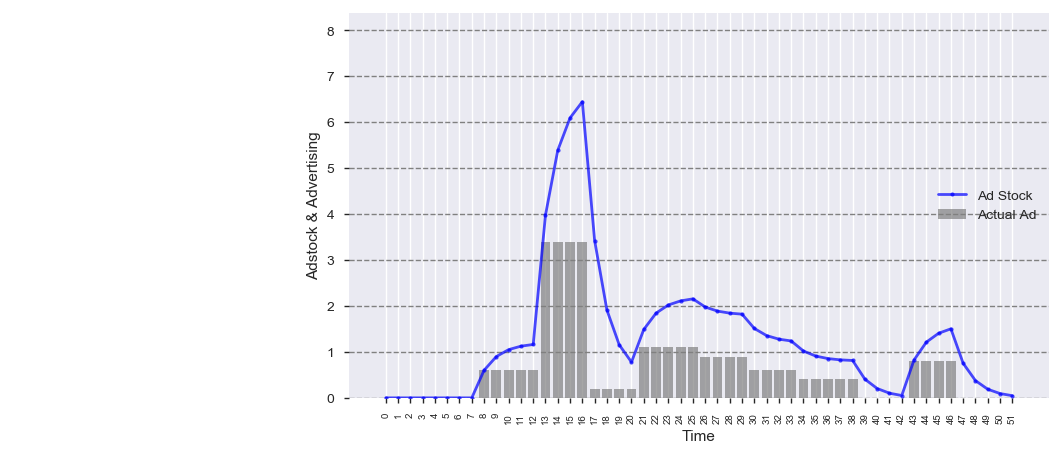

In [477]:
#Adstock rate =.5 
advertising=ConsumerElectronics_gaming_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_gaming_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

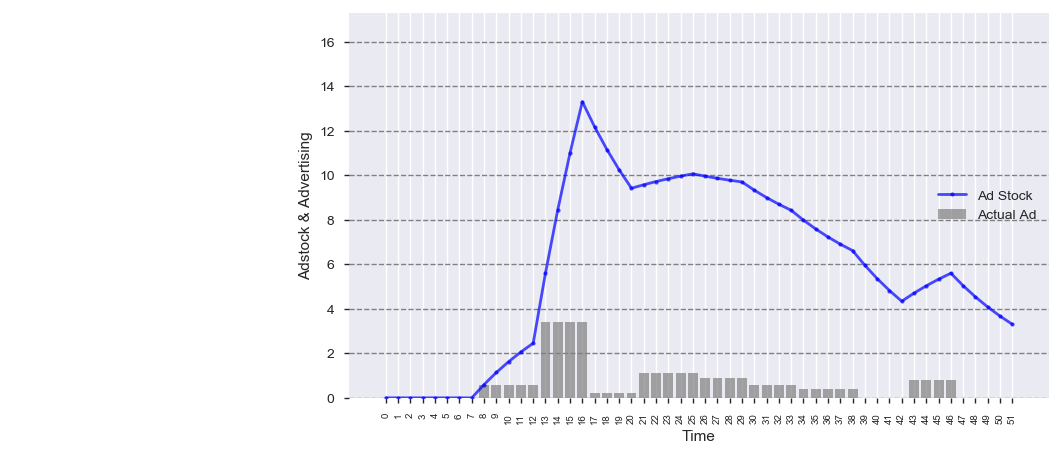

In [478]:
ConsumerElectronics_gaming_full['Adstock_Content_marketing'] = adstocked_advertising(adstock_rate=0.9, advertising=ConsumerElectronics_gaming_full['Content_marketing'])
#Adstock rate =.9
advertising=ConsumerElectronics_gaming_full['Content_marketing']
adstocked_Content_marketing=ConsumerElectronics_gaming_full['Adstock_Content_marketing']
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=None)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.grid(b=False, which='major', color='gray', linestyle='--')
ax.set_ylim([0, 1.3*max(adstocked_Content_marketing)])
bar = ax.bar(np.arange(len(advertising)), advertising, width=0.8, color='gray', alpha=0.7, label='Actual Ad')
line = ax.plot(np.arange(len(advertising)), adstocked_Content_marketing, 
               marker='o', markersize=3, linestyle='-', linewidth=2, color='blue', alpha=0.7, label='Ad Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Adstock & Advertising')
ax.annotate("Advertising Adstock Transformation", (np.mean(np.arange(len(advertising))), 100),
            verticalalignment='bottom', horizontalalignment='center',
            fontsize=15, color='#681963')
ax.set_xticks(np.arange(len(advertising)))
ax.set_xticklabels(labels=np.arange(len(advertising)), minor=False, fontsize=7, rotation=90)
ax.legend(loc='center right')  
plt.show()

### Moving average and Lag Variables

In [479]:
#Computing Moving average to the sales data to evaluate any important features
ConsumerElectronics_gaming_full['ma2_Units']=ConsumerElectronics_gaming_full['Units'].rolling(window=2).mean()
ConsumerElectronics_gaming_full['ma3_Units']=ConsumerElectronics_gaming_full['Units'].rolling(window=3).mean()

ConsumerElectronics_gaming_full['ma2_discount_offered']=ConsumerElectronics_gaming_full['discount_offered'].rolling(window=2).mean()
ConsumerElectronics_gaming_full['ma3_discount_offered']=ConsumerElectronics_gaming_full['discount_offered'].rolling(window=3).mean()

In [480]:
#Taking a backup copy of the master dataset
ConsumerElectronics_gaming_full.shape
ConsumerElectronics_gaming_full_bckup=ConsumerElectronics_gaming_full

In [481]:
#Creating the lag variables for nps, holiday, discounts
dis_off=pd.concat([ConsumerElectronics_gaming_full['discount_offered'].shift(-1), ConsumerElectronics_gaming_full['discount_offered'].shift(-2)], axis=1)
dis_off.columns= ['lag1_discount_offered','lag2_discount_offered']

nps_dtl=pd.concat([ConsumerElectronics_gaming_full['nps'].shift(-1), ConsumerElectronics_gaming_full['nps'].shift(-2)], axis=1)
nps_dtl.columns= ['lag1_nps','lag2_nps']

holiday_dtl=pd.concat([ConsumerElectronics_gaming_full['holiday_flag'].shift(-1), ConsumerElectronics_gaming_full['holiday_flag'].shift(-2)], axis=1)
holiday_dtl.columns= ['lag1_holiday','lag2_holiday']

In [482]:
#Adding the lag variables to the dataset
ConsumerElectronics_gaming_full=pd.concat([ConsumerElectronics_gaming_full.reset_index(drop=True),dis_off],axis=1)
ConsumerElectronics_gaming_full=pd.concat([ConsumerElectronics_gaming_full.reset_index(drop=True),nps_dtl],axis=1)
ConsumerElectronics_gaming_full=pd.concat([ConsumerElectronics_gaming_full.reset_index(drop=True),holiday_dtl],axis=1)

In [483]:
ConsumerElectronics_gaming_full.head()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
0,867.649,902.468,1.055,5.279,0.412,2.981,2015,7.000,28,0.000,2.500,54.600,7.400,1177,17.100,0.200,2.383,0.283,24.833,0.000,4.417,0.000,0.270,0.000,0.000,0.000,2.500,0.200,nan,nan,nan,nan,0.436,0.387,54.600,54.600,1.000,0.000
1,810.786,831.279,1.091,5.201,0.436,2.545,2015,7.000,29,0.000,2.500,54.600,7.400,1177,17.100,0.200,5.183,0.000,28.750,0.000,1.400,0.000,0.249,1.000,1.000,0.000,3.750,0.300,1.073,nan,0.424,nan,0.387,0.445,54.600,54.600,0.000,0.000
2,1007.334,1038.594,1.041,5.318,0.387,2.391,2015,7.000,30,0.000,2.500,54.600,7.400,1177,17.100,0.200,5.060,0.000,29.750,0.000,0.900,0.000,0.240,0.000,0.000,0.000,4.375,0.350,1.066,1.062,0.412,0.412,0.445,0.548,54.600,60.000,0.000,0.000
3,997.036,1042.124,1.053,5.555,0.445,2.955,2015,7.000,31,0.000,2.500,54.600,7.400,1177,17.100,0.200,6.567,0.000,31.583,0.000,4.633,0.000,0.217,1.000,0.000,0.000,4.688,0.375,1.047,1.062,0.416,0.423,0.548,0.386,60.000,60.000,0.000,1.000
4,528.800,528.800,1.000,6.400,0.548,1.600,2015,8.000,32,0.000,1.300,60.000,1.100,1206,5.100,0.000,3.650,0.000,27.200,0.000,0.280,0.000,0.200,0.000,0.000,0.000,3.644,0.188,1.027,1.031,0.496,0.460,0.386,0.463,60.000,60.000,1.000,1.000


In [484]:
#nan treatment in the dataset
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.replace(np.nan, 0)

In [485]:
ConsumerElectronics_gaming_full.describe()

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
count,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000,52.000
mean,831.278,850.902,1.032,5.643,0.447,2.471,2015.500,6.577,53.500,0.656,2.446,49.442,31.687,1154.231,71.773,3.806,1.509,7.457,17.247,0.393,2.896,0.257,0.245,0.442,0.308,5.986,4.839,7.546,1.012,0.992,0.439,0.431,0.439,0.431,48.392,47.342,0.308,0.288
std,149.964,153.935,0.015,0.545,0.038,0.308,0.505,3.489,15.155,0.885,3.047,4.079,25.083,82.766,42.193,2.641,2.200,7.349,9.612,1.538,3.518,0.742,0.196,0.502,0.466,3.882,4.914,4.821,0.144,0.201,0.069,0.091,0.073,0.095,7.932,10.342,0.466,0.457
min,311.500,311.500,1.000,2.750,0.380,1.600,2015.000,1.000,28.000,0.000,0.500,44.400,1.100,1015.000,5.100,0.000,0.000,0.000,-2.833,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.321,0.023,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,743.503,760.981,1.026,5.481,0.416,2.351,2015.000,3.750,40.750,0.000,1.300,46.900,11.700,1052.000,46.775,1.700,0.000,0.212,8.438,0.000,0.300,0.000,0.172,0.000,0.000,3.094,2.547,3.396,1.027,1.028,0.424,0.430,0.416,0.415,46.900,46.900,0.000,0.000
50%,828.730,846.431,1.032,5.762,0.449,2.502,2015.500,6.500,53.500,0.500,1.400,48.150,25.000,1194.000,74.200,4.050,0.000,5.840,17.425,0.000,1.860,0.000,0.186,0.000,0.000,5.782,3.151,8.088,1.032,1.031,0.446,0.447,0.449,0.449,47.300,47.300,0.000,0.000
75%,928.671,945.899,1.039,5.899,0.470,2.583,2016.000,9.250,66.250,0.825,2.200,50.500,56.700,1222.000,100.000,5.400,3.067,12.418,26.292,0.000,4.292,0.000,0.219,1.000,1.000,9.606,4.453,10.681,1.035,1.035,0.466,0.463,0.470,0.470,50.500,50.500,1.000,1.000
max,1218.750,1218.750,1.091,6.471,0.548,3.464,2016.000,12.000,79.000,3.400,12.600,60.000,84.700,1242.000,170.200,9.300,6.567,25.267,31.700,10.333,15.700,3.000,0.961,1.000,1.000,13.305,23.800,18.189,1.073,1.062,0.502,0.495,0.548,0.548,60.000,60.000,1.000,1.000


In [486]:
#Dropping variables with high multi-collinearity
corr = ConsumerElectronics_gaming_full.corr()
corr.style.background_gradient(cmap='coolwarm')

,list_price,GMV,Units,SLA,discount_offered,Procurement_SLA,Year,Month,week_year,Content_marketing,Digital,nps,Sponsorship,Stock_Index,Total_investment,TV,Cool_DegDays,Heat_DegDays,Max_Temp,SnowonGrnd,TotalPrecip,TotalSnow,prepaid_perc,pay_flag,holiday_flag,Adstock_Content_marketing,Adstock_Digital,Adstock_TV,ma2_Units,ma3_Units,ma2_discount_offered,ma3_discount_offered,lag1_discount_offered,lag2_discount_offered,lag1_nps,lag2_nps,lag1_holiday,lag2_holiday
list_price,1,0.998576,0.224943,0.299843,-0.604376,0.0674624,0.21876,-0.137595,0.251172,-0.17833,-0.138574,-0.0666879,0.0941803,-0.0483167,0.0133786,0.0591919,0.174431,-0.200669,0.243275,-0.165821,-0.133323,-0.193933,0.450017,0.0809519,-0.333977,-0.2429,-0.202041,0.108655,-0.0140698,0.00937215,-0.19365,-0.125052,-0.1536,-0.182528,-0.1172,-0.0802305,-0.283501,-0.0216456
GMV,0.998576,1,0.262074,0.289045,-0.609392,0.0772807,0.2139,-0.134254,0.24629,-0.169861,-0.125559,-0.0829072,0.101076,-0.0499884,0.0229531,0.0689973,0.169866,-0.201166,0.242928,-0.169872,-0.135148,-0.19618,0.452322,0.0792539,-0.331992,-0.233323,-0.188496,0.116994,-0.0245691,0.000567549,-0.211331,-0.137826,-0.145077,-0.187718,-0.116745,-0.0820237,-0.285592,-0.0303667
Units,0.224943,0.262074,1,-0.0998694,-0.226757,0.295684,-0.17997,0.13324,-0.179813,0.116535,0.197354,-0.326759,0.223644,-0.0876411,0.186842,0.104648,0.0403424,-0.117873,0.10679,-0.105159,-0.0761367,-0.136568,0.126535,0.124713,0.00948749,0.00823291,0.185432,0.0727176,-0.142452,-0.521412,-0.342044,-0.602124,-0.0168693,-0.0759883,-0.0745134,-0.0266107,-0.133402,-0.15947
SLA,0.299843,0.289045,-0.0998694,1,-0.002219,0.189114,0.104112,-0.0574008,0.123864,0.102897,0.0091858,-0.241432,0.0908694,-0.164521,0.182823,0.231288,-0.362257,0.352846,-0.373091,0.0828705,0.0128347,0.116968,0.0727478,0.185738,-0.276058,0.291123,0.0298901,0.280529,0.101073,0.162054,0.162159,0.13114,0.157081,0.190595,-0.0188313,0.122323,-0.0440428,0.334692
discount_offered,-0.604376,-0.609392,-0.226757,-0.002219,1,-0.125444,0.205849,-0.128677,0.227897,0.0791402,-0.0357181,-0.00394132,-0.14942,0.0765545,-0.0270094,-0.0711492,-0.251229,0.262696,-0.263889,0.11719,0.0649611,0.177924,-0.178587,-0.0242795,0.250899,0.297078,0.0197151,-0.0347855,0.118727,0.114172,0.448149,0.311435,0.198888,0.203747,0.0902291,0.103612,0.154141,0.109032
Procurement_SLA,0.0674624,0.0772807,0.295684,0.189114,-0.125444,1,-0.242085,0.0538438,-0.358556,0.221742,0.212338,-0.164503,0.15865,-0.232609,0.209339,0.187641,-0.170732,0.168002,-0.222035,0.0535391,0.0533207,0.0362289,-0.0251551,0.137162,0.168708,0.0517033,0.154332,0.153108,-0.218029,-0.182347,-0.278283,-0.259278,0.0607484,0.101003,-0.0693535,0.0829596,-0.167176,0.0215285
Year,0.21876,0.2139,-0.17997,0.104112,0.205849,-0.242085,1,-0.86833,0.866186,-0.25677,-0.378612,-0.0190426,-0.314693,0.00516161,-0.113492,0.15369,-0.240022,0.369617,-0.274141,0.213617,0.0897942,0.21848,0.315803,-0.0387202,-0.166667,0.172182,-0.431947,0.241123,0.123043,0.190883,0.250002,0.297906,-0.0356629,-0.122571,-0.106731,-0.156214,-0.166667,-0.127343
Month,-0.137595,-0.134254,0.13324,-0.0574008,-0.128677,0.0538438,-0.86833,1,-0.507728,0.279031,0.38063,-0.196176,0.482566,0.0501898,0.243549,-0.0586879,0.132712,-0.389038,0.277935,-0.314434,-0.155854,-0.284318,-0.263633,0.0418118,0.0816379,-0.00191076,0.454624,-0.111936,-0.0052734,-0.0176619,-0.102494,-0.110206,-0.0218742,-0.00196663,-0.099458,-0.075197,0.0454574,-0.0203195
week_year,0.251172,0.24629,-0.179813,0.123864,0.227897,-0.358556,0.866186,-0.507728,1,-0.163847,-0.273035,-0.230097,-0.0616632,0.05684,0.0491128,0.210221,-0.280207,0.251344,-0.197453,0.0532519,-0.00208606,0.0892837,0.285263,-0.029669,-0.210994,0.297391,-0.291579,0.31143,0.220914,0.324847,0.339543,0.414434,-0.100473,-0.230915,-0.301666,-0.365173,-0.255414,-0.230504
Content_marketing,-0.17833,-0.169861,0.116535,0.102897,0.0791402,0.221742,-0.25677,0.279031,-0.163847,1,0.897284,-0.610123,0.716364,-0.060315,0.848978,0.361719,-0.370672,0.0997235,-0.207481,0.012413,-0.158449,-0.05477

In [487]:
#import pandas_profiling
pandas_profiling.ProfileReport(ConsumerElectronics_gaming_full)

Number of variables,38
Number of observations,52
Total Missing (%),0.0%
Total size in memory,15.5 KiB
Average record size in memory,305.5 B
Numeric,29
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,4


In [488]:
#Removing rejected variables based on the profiling/correlation plot
ConsumerElectronics_gaming_full = ConsumerElectronics_gaming_full.drop(columns=['Digital','TV', 'list_price', 'ma2_discount_offered','ma3_discount_offered','ma3_Units','Month','Year'])

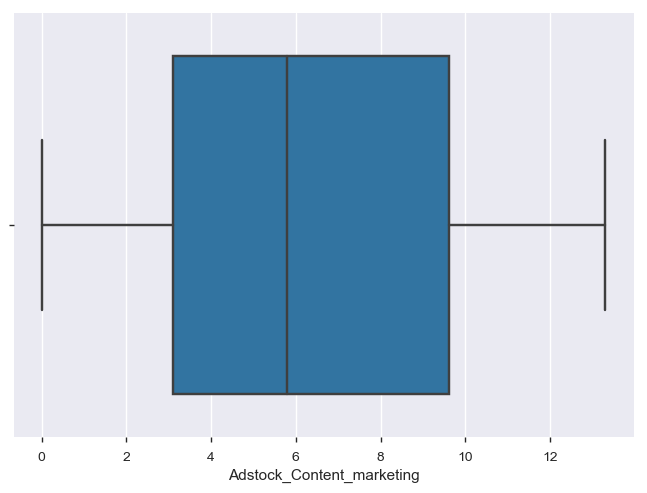

In [489]:
#Ensuring extreme outliers are removed from the data, by evaluation of each and every variable
import seaborn as sns
sns.boxplot(x=ConsumerElectronics_gaming_full['Adstock_Content_marketing'])

In [490]:
### Creating a backup data
ConsumerElectronics_gaming_full_bkp = ConsumerElectronics_gaming_full.copy(deep=True)

# Model Building

In [491]:
ConsumerElectronics_gaming_full = ConsumerElectronics_gaming_full.drop(columns=['week_year', 'Units'])

In [492]:
# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [493]:
#Building a basic linear reg model on the analytical dataset
lreg = LinearRegression()
X=scaled_df.drop(columns=['GMV'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.GMV)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_cv)

In [494]:
mse = np.mean((pred - y_cv)**2)
# calculating coefficients
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,SLA,0.249
1,discount_offered,-0.472
2,Procurement_SLA,0.296
3,Content_marketing,-0.683
4,nps,0.349
5,Sponsorship,-0.759
6,Stock_Index,0.191
7,Total_investment,1.598
8,Cool_DegDays,0.394
9,Heat_DegDays,-0.608


In [495]:
lreg.score(x_cv,y_cv)

-6.237293592877016

In [524]:
#Alternate way of computing all the model statistics easily using sm.OLS
model = sm.OLS(y_train,x_train)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2.392
Date:                Thu, 15 Aug 2019   Prob (F-statistic):             0.0571
Time:                        16:21:23   Log-Likelihood:                -13.115
No. Observations:                  39   AIC:                             80.23
Df Residuals:                      12   BIC:                             125.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
SLA                   

In [497]:
predictions = results.predict(x_cv)
predictions

38    0.363
9     0.787
40    1.164
20    0.356
6    -1.723
12   -0.341
33   -1.216
25   -1.242
24   -1.041
0     2.967
1    -0.402
7     1.113
51   -3.687
dtype: float64

In [498]:
#Initial RMSE
math.sqrt(np.mean(np.square((predictions-y_cv))))

1.901462163309705

In [499]:
#handling multicollinearity
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True False  True False  True False  True  True  True False False
 False False  True False False False False False  True  True False False
 False False False]
[ 1  1  2  1  5  1  7  1  1  1  9 16  8 10  1  6 14  4  3 12  1  1 13 18
 11 17 15]


In [500]:
x_rfe = x_train[x_train.columns[rfe.support_]]
model_rfe = sm.OLS(y_train,x_rfe)
results_rfe = model_rfe.fit()
results_rfe.params
print(results_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     9.458
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           9.54e-07
Time:                        16:18:24   Log-Likelihood:                -20.991
No. Observations:                  39   AIC:                             61.98
Df Residuals:                      29   BIC:                             78.62
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SLA                       0.19

### Feature selection using Boruta and Grading boosting
http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/?source=post_page---------------------------

In [501]:
#Another way to handle mutli collinearity in the data using Gradient Boosting Regressor
def greedy_elim(df):

    # do feature selection using boruta
    X = df[[x for x in df.columns if x!='GMV']]
    y = df['GMV']
    #model = RandomForestRegressor(n_estimators=50)
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.05)
    # 150 features seems to be the best at the moment. Why this is is unclear.
    feat_selector = RFE(estimator=model, step=1, n_features_to_select=6)

    # find all relevant features
    feat_selector.fit_transform(X.as_matrix(), y.as_matrix())

    # check selected features
    features_bool = np.array(feat_selector.support_)
    features = np.array(X.columns)
    result = features[features_bool]
    #print(result)

    # check ranking of features
    features_rank = feat_selector.ranking_
    #print(features_rank)
    rank = features_rank[features_bool]
    #print(rank)

    return result 

In [502]:
from sklearn.ensemble import GradientBoostingRegressor
greedy_elim(ConsumerElectronics_gaming_full)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


array(['discount_offered', 'nps', 'Max_Temp', 'prepaid_perc',
       'Adstock_Content_marketing', 'Adstock_TV'], dtype=object)

In [514]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['discount_offered', 'nps', 'Max_Temp', 'prepaid_perc',
       'Adstock_Content_marketing', 'Adstock_TV']]

In [515]:
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     9.333
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           5.33e-06
Time:                        16:19:09   Log-Likelihood:                -29.912
No. Observations:                  39   AIC:                             71.82
Df Residuals:                      33   BIC:                             81.81
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
discount_offered      

In [516]:
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'nps', 'Max_Temp', 'prepaid_perc',
       'Adstock_Content_marketing', 'Adstock_TV']]
#results.predict(x_cv2)

In [517]:
#RMSE
math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))

1.2334118340632738

In [518]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

1.5213047524073287

### Feature selection using p-value

In [508]:
#Stepwise variable elimination method for linear regression with in and out p-value thresholds implementation
def stepwise_selection(X, y, 
                       #initial_list=['SLA','Adstock_Content_marketing','Adstock_Digital','Adstock_TV'], 
                       initial_list = ['SLA', 'discount_offered', 'Procurement_SLA', 'Content_marketing', 'nps', 
                                       'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 
                                       'Max_Temp', 'SnowonGrnd', 'TotalPrecip', 'TotalSnow', 'prepaid_perc', 'pay_flag',
                                       'holiday_flag', 'Adstock_Content_marketing', 'Adstock_Digital', 'Adstock_TV',
                                       'ma2_Units', 'lag1_discount_offered', 'lag2_discount_offered', 'lag1_nps',
                                       'lag2_nps', 'lag1_holiday', 'lag2_holiday'],
                       threshold_in=0.001, 
                       threshold_out = 0.1, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [509]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

Drop lag1_nps                       with p-value 0.980298
Drop Adstock_TV                     with p-value 0.869524
Drop Adstock_Content_marketing      with p-value 0.798677
Drop Adstock_Digital                with p-value 0.926298
Drop Max_Temp                       with p-value 0.815405


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop lag2_discount_offered          with p-value 0.833417
Drop lag2_nps                       with p-value 0.743078
Drop holiday_flag                   with p-value 0.739608
Drop lag2_holiday                   with p-value 0.747037
Drop SnowonGrnd                     with p-value 0.652181
Drop nps                            with p-value 0.528241
Drop Stock_Index                    with p-value 0.660273
Drop TotalSnow                      with p-value 0.574015
Drop lag1_holiday                   with p-value 0.431574
Drop TotalPrecip                    with p-value 0.153085
Drop ma2_Units                      with p-value 0.127879
Drop pay_flag                       with p-value 0.159307
Drop Procurement_SLA                with p-value 0.17171
Drop SLA                            with p-value 0.152268
resulting features:
['discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']


In [519]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,[ 'discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]

In [520]:
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     11.31
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           2.50e-07
Time:                        16:20:04   Log-Likelihood:                -22.622
No. Observations:                  39   AIC:                             61.24
Df Residuals:                      31   BIC:                             74.55
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
discount_offered         -0.47

In [521]:
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Total_investment', 'Cool_DegDays', 'Heat_DegDays', 'prepaid_perc', 'lag1_discount_offered']]
#results.predict(x_cv2)

In [522]:
#RMSE
math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))

1.4739139608794203

In [523]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

2.172422364075261

### Koyck Model

In [525]:
#Koyck Model (Lag 1 of GMV)
ConsumerElectronics_gaming_full['GMV_1']=ConsumerElectronics_gaming_full['GMV'].shift(-1)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)

# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['GMV'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.GMV)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop lag1_holiday                   with p-value 0.982828
Drop Adstock_Content_marketing      with p-value 0.944268
Drop holiday_flag                   with p-value 0.933897
Drop Heat_DegDays                   with p-value 0.877705
Drop Procurement_SLA                with p-value 0.857142
Drop Stock_Index                    with p-value 0.822373
Drop lag1_discount_offered          with p-value 0.460823
Drop Cool_DegDays                   with p-value 0.555048
Drop ma2_Units                      with p-value 0.596559
Drop SnowonGrnd                     with p-value 0.229153
Drop TotalSnow                      with p-value 0.200522
Drop TotalPrecip                    with p-value 0.178888
Drop pay_flag                       with p-value 0.130234
resulting features:
['SLA', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_nps', 'lag2_holiday']


In [526]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['SLA', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['SLA', 'discount_offered', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Max_Temp', 'prepaid_perc', 'Adstock_Digital', 'Adstock_TV', 'lag2_discount_offered', 'lag1_nps', 'lag2_holiday']]
#results.predict(x_cv2)

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     6.258
Date:                Thu, 15 Aug 2019   Prob (F-statistic):           3.78e-05
Time:                        16:22:40   Log-Likelihood:                -26.511
No. Observations:                  39   AIC:                             79.02
Df Residuals:                      26   BIC:                             100.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SLA                       0.35

In [ ]:
#RMSE
#rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
#rmse

In [ ]:
#MSE
#mse = np.mean((results.predict(x_cv2) - y_cv)**2)
#mse

### Distributed Lag Models

In [527]:
#Distributed Lag Models
ConsumerElectronics_gaming_full['GMV_1']=ConsumerElectronics_gaming_full['GMV'].shift(-1)
ConsumerElectronics_gaming_full['GMV_2']=ConsumerElectronics_gaming_full['GMV'].shift(-2)
ConsumerElectronics_gaming_full['GMV_3']=ConsumerElectronics_gaming_full['GMV'].shift(-3)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)

# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['GMV'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.GMV)

#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop Max_Temp                       with p-value 0.946249
Drop TotalSnow                      with p-value 0.890195
Drop lag2_holiday                   with p-value 0.806505
Drop lag2_discount_offered          with p-value 0.658167
Drop lag2_nps                       with p-value 0.664597
Drop SnowonGrnd                     with p-value 0.587647
Drop holiday_flag                   with p-value 0.595584
Drop ma2_Units                      with p-value 0.593101
Drop Stock_Index                    with p-value 0.780364
Drop Adstock_Digital                with p-value 0.754605
Drop lag1_holiday                   with p-value 0.603765
Drop Cool_DegDays                   with p-value 0.260096
Drop TotalPrecip                    with p-value 0.333408
Drop pay_flag                       with p-value 0.117841
resulting features:
['SLA', 'discount_offered', 'Procurement_SLA', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing

In [537]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['SLA', 'discount_offered', 'Procurement_SLA', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['SLA', 'discount_offered', 'Procurement_SLA', 'Content_marketing', 'nps', 'Sponsorship', 'Total_investment', 'Heat_DegDays', 'prepaid_perc', 'Adstock_Content_marketing', 'Adstock_TV', 'lag1_discount_offered', 'lag1_nps','GMV_1']]
results.predict(x_cv2)


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.034
Date:                Thu, 15 Aug 2019   Prob (F-statistic):              0.455
Time:                        16:25:25   Log-Likelihood:                -120.96
No. Observations:                  39   AIC:                             269.9
Df Residuals:                      25   BIC:                             293.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
SLA                   

0    -14.138
15     0.562
9      6.011
7    -48.594
46   -18.638
4     -2.940
21     5.941
28    -1.676
42     3.817
6    -28.961
30     8.930
45   -10.789
10     3.720
dtype: float64

In [529]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

1.209161423911362

In [530]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

1.462071349075352

### Exponential/Multiplicative Models

In [531]:
#Exponential/Multiplicative Models
ConsumerElectronics_gaming_full=np.log(ConsumerElectronics_gaming_full)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.fillna(0)
ConsumerElectronics_gaming_full=ConsumerElectronics_gaming_full.replace([np.inf, -np.inf], 0)

# Get column names first
names = ConsumerElectronics_gaming_full.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(ConsumerElectronics_gaming_full)
scaled_df = pd.DataFrame(scaled_df, columns=names)

X=scaled_df.drop(columns=['GMV'])
x_train, x_cv, y_train, y_cv = train_test_split(X,scaled_df.GMV)

x_train, x_cv, y_train, y_cv = train_test_split(X,ConsumerElectronics_gaming_full.GMV)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [532]:
#Computing the best model automatically
result = stepwise_selection(x_train, y_train)
print('resulting features:')
print(result)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop nps                            with p-value 0.94383
Drop ma2_Units                      with p-value 0.929149
Drop SnowonGrnd                     with p-value 0.849458
Drop Adstock_Content_marketing      with p-value 0.833625
Drop lag2_nps                       with p-value 0.818117
Drop prepaid_perc                   with p-value 0.559457
Drop SLA                            with p-value 0.672944
Drop holiday_flag                   with p-value 0.673993
Drop pay_flag                       with p-value 0.416799
Drop lag2_discount_offered          with p-value 0.315417
Drop lag1_nps                       with p-value 0.370535
Drop TotalSnow                      with p-value 0.345824
Drop Procurement_SLA                with p-value 0.285589
Drop Heat_DegDays                   with p-value 0.335275
Drop lag1_discount_offered          with p-value 0.344268
Drop TotalPrecip                    with p-value 0.209068
resulting features:
['discount_offered', 'Content_marketing', 'Sponsorshi

In [533]:
#Subsetting the data based on the above automatic determination of final variables for the model
x_train1=x_train.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
#On the shortlisted data obtaining the final model statistics
model = sm.OLS(y_train,x_train1)
results = model.fit()
results.params
print(results.summary())
#Predicting on the test data
x_cv2=x_cv.loc[:,['discount_offered', 'Content_marketing', 'Sponsorship', 'Stock_Index', 'Total_investment', 'Cool_DegDays', 'Max_Temp', 'Adstock_Digital', 'Adstock_TV', 'lag1_holiday']]
results.predict(x_cv2)


                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.172
Method:                 Least Squares   F-statistic:                    0.3653
Date:                Thu, 15 Aug 2019   Prob (F-statistic):              0.943
Time:                        16:24:00   Log-Likelihood:                -127.84
No. Observations:                  39   AIC:                             273.7
Df Residuals:                      30   BIC:                             288.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
discount_offered     -0.6138      1.49

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


0    -5.586
15    2.568
9    -0.083
7    -9.214
46   -4.378
4    -2.395
21    2.147
28   -1.067
42    2.013
6    -6.606
30    0.876
45   -4.505
10    0.213
dtype: float64

In [534]:
#RMSE
rmse=math.sqrt(np.mean(np.square((results.predict(x_cv2)-y_cv))))
rmse

9.301311053310831

In [535]:
#MSE
mse = np.mean((results.predict(x_cv2) - y_cv)**2)
mse

86.51438731044225

### Models Comparison

At different iterations there might be slight variations in the numbers due to different seed values and elimination process.
Boruta and Grading boosting is the best model due to high and best R-square.

### Outlier Treatment

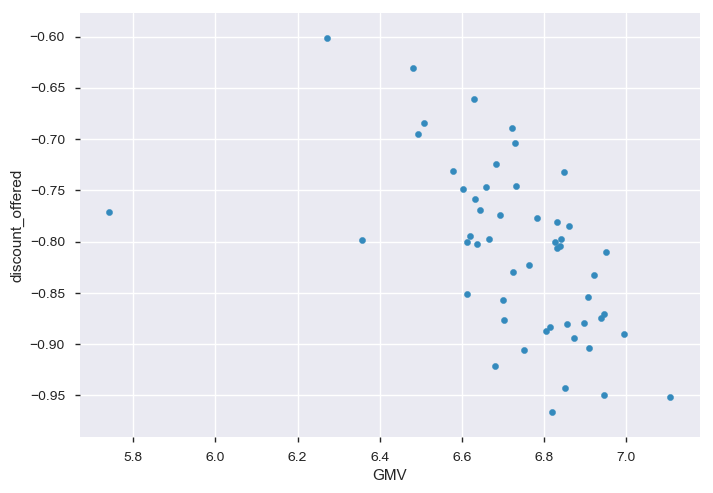

In [540]:
ConsumerElectronics_gaming_full.plot.scatter('GMV','discount_offered')

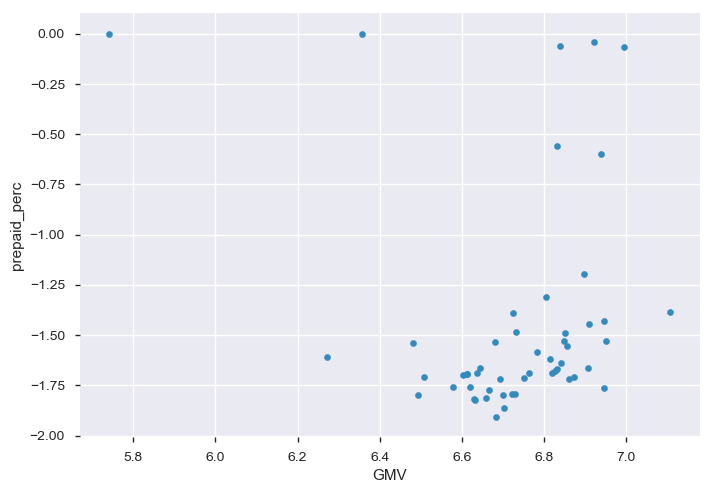

In [541]:
ConsumerElectronics_gaming_full.plot.scatter('GMV','prepaid_perc')

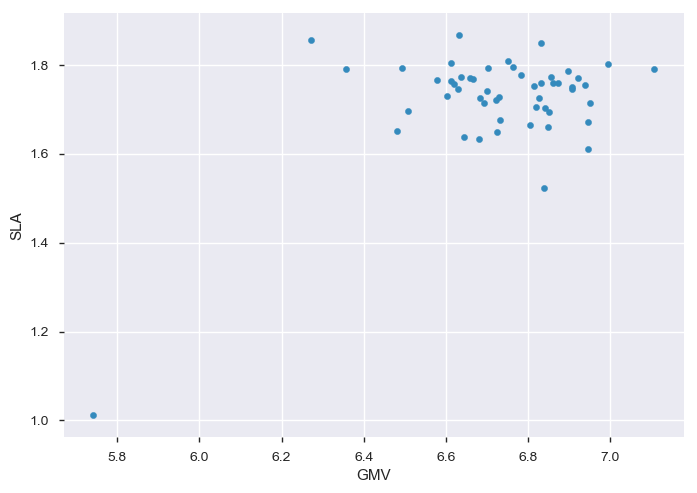

In [542]:
ConsumerElectronics_gaming_full.plot.scatter('GMV','SLA')

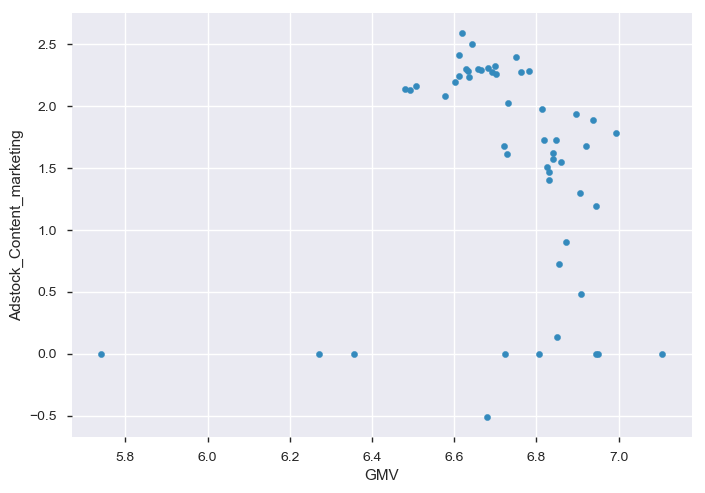

In [543]:
ConsumerElectronics_gaming_full.plot.scatter('GMV','Adstock_Content_marketing')

In [544]:
#Outlier Treatments creating function for identifing lower and upper range
%matplotlib inline
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [545]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.Adstock_Content_marketing)
lowerbound,upperbound

(-0.5898680551402935, 3.973750437213721)

In [547]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.discount_offered)
lowerbound,upperbound

(-1.0595863359345683, -0.5733392703905669)

In [548]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.SLA)
lowerbound,upperbound

(1.5910709523052617, 1.8849499369879343)

In [549]:
lowerbound,upperbound = outlier_treatment(ConsumerElectronics_gaming_full.prepaid_perc)
lowerbound,upperbound

(-2.113023994895217, -1.089369542848498)

In [550]:
#Range identification and manually deciding the cut off
lower_range=0.09
upper_range=0.6
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc < lower_range)|(ConsumerElectronics_gaming_full.prepaid_perc > upper_range)]

0    -1.311
1    -1.389
2    -1.428
3    -1.530
4    -1.609
5    -1.386
6     0.000
7     0.000
8    -1.534
9    -1.487
10   -1.444
11   -1.554
12   -1.708
13   -1.690
14   -1.538
15   -1.713
16   -1.760
17   -1.665
18   -1.694
19   -1.799
20   -1.696
21   -1.861
22   -1.720
23   -1.821
24   -1.818
25   -1.905
26   -1.815
27   -1.772
28   -1.583
29   -1.686
30   -1.687
31   -1.698
32   -1.710
33   -1.797
34   -1.757
35   -1.483
36   -1.621
37   -1.194
38   -0.596
39   -0.066
40   -0.040
41   -0.060
42   -0.558
43   -1.719
44   -1.791
45   -1.792
46   -1.531
47   -1.637
48   -1.676
49   -1.669
50   -1.665
51   -1.763
Name: prepaid_perc, dtype: float64

In [551]:
#outlier Treatment
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc < lower_range) ]=lower_range
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc > upper_range)]=upper_range

In [552]:
#post Treatment
ConsumerElectronics_gaming_full.prepaid_perc[(ConsumerElectronics_gaming_full.prepaid_perc < lower_range)|(ConsumerElectronics_gaming_full.prepaid_perc > upper_range)]

Series([], Name: prepaid_perc, dtype: float64)

In [553]:
#Regularization implementation - advanced modeling
## training the model on ridge reg
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_cv)
mse = np.mean((pred - y_cv)**2)
mse

0.15494908469331256

In [554]:
ridgeReg.coef_

array([ 0.03162594, -0.07136516,  0.00272928,  0.01447745,  0.03267472,
        0.00230472, -0.02799224, -0.0340185 , -0.01949028, -0.04393449,
        0.01292324, -0.0114242 ,  0.00666437, -0.01505546,  0.0415326 ,
        0.        ,  0.        ,  0.01653706, -0.02459515,  0.00799762,
       -0.01012315,  0.02812038,  0.00414657,  0.01243877, -0.00232206,
        0.        ,  0.        ,  0.00210329, -0.00724298, -0.0016658 ])

In [555]:
#training model using lasso reg
lassoReg = Lasso(alpha=.05, normalize=True)
lassoReg.fit(x_train,y_train)
pred = lassoReg.predict(x_cv)

# calculating mse
mse = np.mean((pred - y_cv)**2)
mse
lassoReg.score(x_cv,y_cv)

-0.16486546232563515

In [556]:
lassoReg.coef_

array([ 0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0., -0.,  0.,
        0., -0., -0., -0.])

In [557]:
#traning the model on elastic net reg
ENreg = ElasticNet(alpha=.1, l1_ratio=0.5, normalize=False)
ENreg.fit(x_train,y_train)
pred_cv = ENreg.predict(x_cv)

#calculating mse
mse = np.mean((pred - y_cv)**2)
mse

0.11554047811610094

In [558]:
ENreg.coef_

array([ 0.        , -0.04880486, -0.        ,  0.        ,  0.00990234,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.01014643,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ])